In [1]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

#### NPG Palette

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
 [7] "#91D1C2FF" "#DC0000FF" "#7E6148FF" "#B09C85FF"

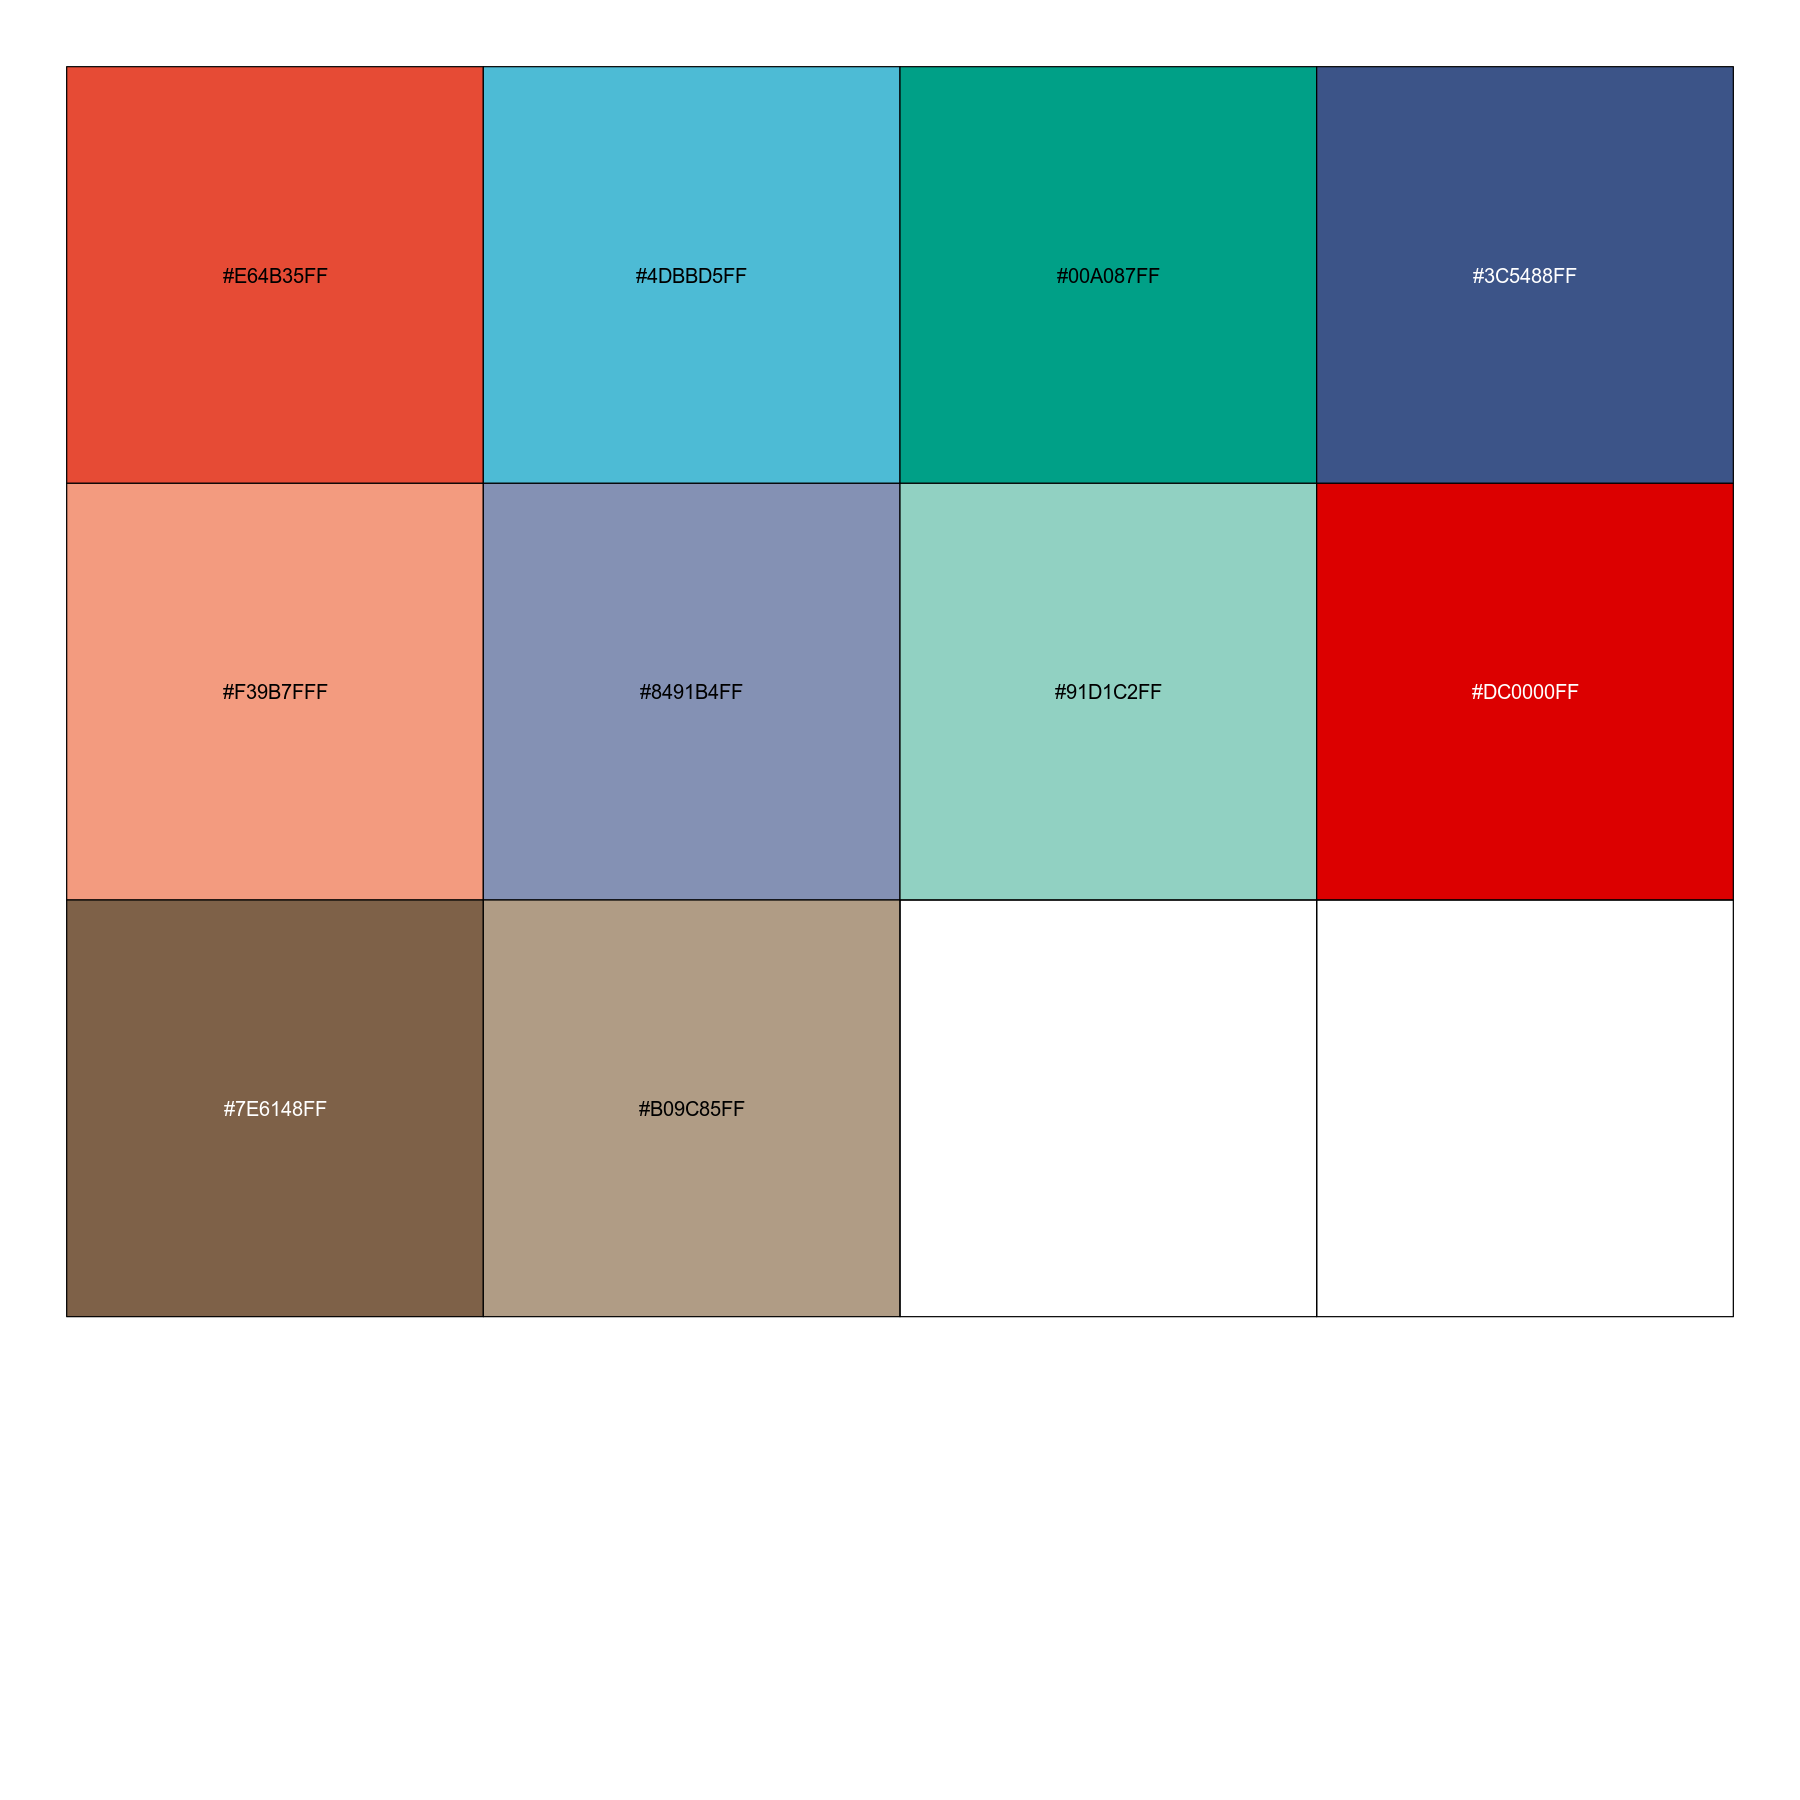

In [506]:
library("scales")
pal_npg("nrc")(10)
show_col(pal_npg("nrc")(10))


# CONST & ALT PART

### UTRs


In [2]:
utrs <- read_parquet('/gstock/EXOTIC/data/GENOMICS/UTRs_genes.parquet')
utrs <- utrs[utrs['Nb_combi'] == 1, ]


### CONSERVATION

In [3]:
tmp_phylocsf_path <- "/gstock/EXOTIC/data/CONSERVATION/phyloCSF_bool_Rdata.parquet"
phylocsf <- read_parquet(tmp_phylocsf_path)

phylocsf <- phylocsf %>% filter(!Gene %in% utrs$Gene)


phylocsf$phylocsf_bins <- cut(phylocsf$phyloCSF_score, breaks = c(-1e+06, -100, 1000, 1e+06), labels = c("Poorly conserved", "~", "Conserved"))
phylocsf$phylocsf_bins <- factor(phylocsf$phylocsf_bins, ordered = FALSE)
phylocsf <- phylocsf %>% mutate_if(is.character, as.factor)
new_df_phylocsf <- phylocsf[phylocsf$phylocsf_bins == "Conserved" | phylocsf$phylocsf_bins == "Poorly conserved" , ]


head(new_df_phylocsf)


Gene,ranges,phyloCSF_score,Ratio_num,Standard,Unconserved,Conserved,Constitutive,Alternative,Const_Alt,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020,phylocsf_bins
<fct>,<fct>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>
A2M,9247569-9247680,-262.0118,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
A2ML1,9002265-9002355,-128.3333,1,FALSE,TRUE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Poorly conserved
AATK,79094001-79096623,5871.9743,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139902868-139903074,1083.4374,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139907164-139907377,1188.0156,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved
ABCA2,139907454-139907770,1719.5819,1,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE,Conserved


### CONSTRAINT

In [4]:
ccrs_path <- "/gstock/EXOTIC/data/VARIATIONS/CCRS_modified_refseq_corrected_Rdata.parquet"
ccrs_df <- read_parquet(ccrs_path)

ccrs_df <- ccrs_df %>% filter(!Gene %in% utrs$Gene)


ccrs_df <- ccrs_df %>% mutate_if(is.character, as.factor)



ccrs_df_lite <- rbind(head(ccrs_df[ccrs_df$CCRS_bins == "95 - 100" & ccrs_df$Const_Alt == "Const", ], 1000), ccrs_df %>% group_by(CCRS_bins) %>% sample_n(500))
ccrs_df_lite <- ccrs_df_lite %>% mutate_if(is.character, as.factor)

head(ccrs_df_lite)


`mutate_if()` ignored the following grouping variables:
Column `CCRS_bins`



Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCR_95_99_bool,CCR_99_100_bool,CCR_95_100_bool,Constitutive,Alternative,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NCAPD3,11,134093784-134093785,134093784,134093785,0.000000,0,NA,134093757-134093820,0.60,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
DMXL2,15,51791102-51791105,51791102,51791105,11.809070,0,NA,51790749-51792428,1.00,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TCF20,22,42607500-42607501,42607500,42607501,0.000000,0,NA,42605657-42611311,1.00,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FNBP4,11,47746051-47746052,47746051,47746052,0.000000,0,NA,47746020-47746330,1.00,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
PCDH7,4,30723358-30723359,30723358,30723359,0.000000,0,NA,30723045-30726218,0.75,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
PCDHA10,5,140235730-140235732,140235730,140235732,4.174013,0,NA,140235634-140238021,0.50,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE


### VARIATIONS

In [5]:
tmp_variants_path = '/gstock/EXOTIC/data/VARIATIONS/ClinVar_gnomAD_all_2021_refseq_corrected_Rdata.parquet'
merge_df_variants <- read_parquet(tmp_variants_path)

merge_df_variants <- merge_df_variants %>% filter(!Gene %in% utrs$Gene)

merge_df_variants <- merge_df_variants %>% mutate_if(is.character, as.factor)



merge_df_variants_lite <- merge_df_variants %>% group_by(Status) %>% sample_n(500)
merge_df_variants_lite <- merge_df_variants_lite %>% mutate_if(is.character, as.factor)

head(merge_df_variants)
colnames(merge_df_variants)

`mutate_if()` ignored the following grouping variables:
Column `Status`



ALT,AN,CHROM,CLNREVSTAT,DP,Gene,HPO,ID,MAF,MC,⋯,Ratio_num_bins,Benign,Pathogenic,Constitutive,Alternative,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<list<character>>,<fct>,<dbl>,<fct>,⋯,<ord>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
T,NA,12,"criteria_provided,_single_submitter",NA,A2ML1,HP:0000388,12_8975257_C_T,NA,nonsense,⋯,0.4 - 0.6,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
A,249540,12,NA,7844744,A2ML1,NULL,12_8975256_T_A,3.96730e-04,"['synonymous_variant', 'upstream_gene_variant']",⋯,0.4 - 0.6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
G,249552,12,NA,7901603,A2ML1,NULL,12_8975268_A_G,5.20934e-05,"['synonymous_variant', 'upstream_gene_variant']",⋯,0.4 - 0.6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
C,249568,12,NA,7927104,A2ML1,NULL,12_8975273_T_C,2.00346e-05,"['missense_variant', 'upstream_gene_variant']",⋯,0.4 - 0.6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
G,249568,12,NA,7932134,A2ML1,NULL,12_8975281_C_G,8.01385e-06,"['missense_variant', 'upstream_gene_variant']",⋯,0.4 - 0.6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
T,249552,12,NA,7915493,A2ML1,NULL,12_8975287_C_T,8.01436e-06,"['missense_variant', 'upstream_gene_variant']",⋯,0.4 - 0.6,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] "ALT"            "AN"             "CHROM"          "CLNREVSTAT"    
 [5] "DP"             "Gene"           "HPO"            "ID"            
 [9] "MAF"            "MC"             "POS"            "REF"           
[13] "RS_STARS"       "Real_Status"    "Status"         "VAR_ID"        
[17] "alleleid"       "ranges"         "rs"             "Ratio_num"     
[21] "Const_Alt"      "Ratio_num_bins" "Benign"         "Pathogenic"    
[25] "Constitutive"   "Alternative"    "Cat80100"       "Cat6080"       
[29] "Cat4060"        "Cat2040"        "Cat0020"

### Odds Ratio

#### Example

In [70]:
explanatory <- c('phylocsf_bins')
dependent <- "Constitutive"  # Bowel perforation
t3 <-  new_df_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...





|explanatory            |OR                        |
|:----------------------|:-------------------------|
|phylocsf_binsConserved |2.43 (2.20-2.68, p<0.001) |

### DEF compute OR

In [6]:
compute_or <- function(expl, dep, df, group) {
    
    # INIT
    cat_df <- c()
    or_df <- c()
    ic_low_df <- c()
    ic_up_df <- c()
    pvalue_df <- c()
    i = 0
    i_df <- c()
    group_df <- c()
    for (cat in expl){
        
        tmp_df <- select(df, dep, cat)

        
        # ASSIGN
        explanatory <- cat
        dependent <- dep  # Bowel perforation
        
        # COMPUTE
        t3 <- tmp_df %>% glmuni(dependent, explanatory) %>% fit2df()
        print(t3)
        
        # INCREMENT
        i = i + 1
        i_df <- c(i_df, i)
        
        
        l_or <- gsub("[\\(\\)p=<]", "", unlist(strsplit(t3$OR, " ")))
        or <- as.numeric(l_or[1])
        ic <-  gsub(",", "",(unlist(strsplit(l_or[2], "-"))))
        ic_low <- as.numeric(ic[1])
        ic_up <- as.numeric(ic[2])
        pvalue <- as.numeric(l_or[3])

        # FILL
        cat_df <- c(cat_df, cat)
        or_df <- c(or_df, or)
        ic_low_df <- c(ic_low_df, ic_low)
        ic_up_df <- c(ic_up_df, ic_up)
        pvalue_df <- c(pvalue_df, pvalue)
    #     group_df <- c(group_df, "Constraint")
    }

    output_df <- data.frame("Cat" = cat_df, "OR" = or_df, "IC_low" = ic_low_df, "IC_up" = ic_up_df, "Pvalue" = pvalue_df, "id" = i_df) 
    output_df$group = group
#     output_df$Cat = 
    return(output_df)
}


## Use function with the three components for Const / Alt

In [19]:
test <- compute_or(c('phylocsf_bins'), c('Const_Alt'), new_df_phylocsf, "Conservation")
test

Waiting for profiling to be done...



             explanatory                        OR
1 phylocsf_binsConserved 2.43 (2.20-2.68, p<0.001)


Cat,OR,IC_low,IC_up,Pvalue,id,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
phylocsf_bins,2.43,2.2,2.68,0.001,1,Conservation


In [18]:
conservation_or_df <- compute_or(c('Conserved'), c('Const_Alt'), new_df_phylocsf, "Conservation")

Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 2.36 (2.14-2.61, p<0.001)


In [19]:
ccrs_or_df <- compute_or(c('CCR_0_20_bool', 'CCR_20_80_bool', 'CCR_80_90_bool', 'CCR_90_95_bool', 'CCR_95_100_bool'), c('Const_Alt'), ccrs_df, "Constraint")

Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 0.91 (0.91-0.92, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 1.06 (1.05-1.07, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 1.24 (1.20-1.28, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 1.42 (1.35-1.49, p<0.001)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 1.65 (1.55-1.76, p<0.001)


In [20]:
variants_or_df <- compute_or(c('Pathogenic'), c('Const_Alt'), merge_df_variants, "Variations")

Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 1.05 (1.02-1.08, p=0.002)


In [21]:
output_df <- rbind(conservation_or_df, ccrs_or_df, variants_or_df)
output_df

Cat,OR,IC_low,IC_up,Pvalue,id,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Conserved,2.36,2.14,2.61,0.001,1,Conservation
CCR_0_20_bool,0.91,0.91,0.92,0.001,1,Constraint
CCR_20_80_bool,1.06,1.05,1.07,0.001,2,Constraint
CCR_80_90_bool,1.24,1.20,1.28,0.001,3,Constraint
CCR_90_95_bool,1.42,1.35,1.49,0.001,4,Constraint
CCR_95_100_bool,1.65,1.55,1.76,0.001,5,Constraint
Pathogenic,1.05,1.02,1.08,0.002,1,Variations


In [429]:
empty_bar <- 2
nObsType <- 1

data <- output_df

to_add <- data.frame(matrix(NA, empty_bar * length(unique(data$group)) * nObsType, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
# data <- rbind(data, to_add)
# data <- data %>% arrange(group, Cat)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)
data

Cat,OR,IC_low,IC_up,Pvalue,id,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
CCR_0_20_bool,0.49,0.40,0.60,0.001,1,Constraint
CCR_20_80_bool,0.59,0.48,0.72,0.001,2,Constraint
CCR_80_90_bool,0.81,0.66,1.00,0.046,3,Constraint
CCR_90_95_bool,0.88,0.72,1.08,0.213,4,Constraint
CCR_95_99_bool,1.06,0.86,1.32,0.564,5,Constraint
CCR_99_100_bool,3.28,2.69,4.03,0.001,6,Constraint
NA,NA,NA,NA,NA,7,Constraint
NA,NA,NA,NA,NA,8,Constraint


In [36]:
pal_npg("nrc")(10)[1]

[1] "#E64B35FF"

### Produce figure

Cat,OR,IC_low,IC_up,Pvalue,id,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Conserved,2.36,2.14,2.61,0.001,1,Conservation
0 - 20,0.91,0.91,0.92,0.001,1,Constraint
20 - 80,1.06,1.05,1.07,0.001,2,Constraint
80 - 90,1.24,1.20,1.28,0.001,3,Constraint
90 - 95,1.42,1.35,1.49,0.001,4,Constraint
95 - 100,1.65,1.55,1.76,0.001,5,Constraint
Pathogenic,1.05,1.02,1.08,0.002,1,Variations


Warning message:
“Ignoring unknown aesthetics: x”


[1] "Conserved"  "0 - 20"     "20 - 80"    "80 - 90"    "90 - 95"   
[6] "95 - 100"   "Pathogenic"

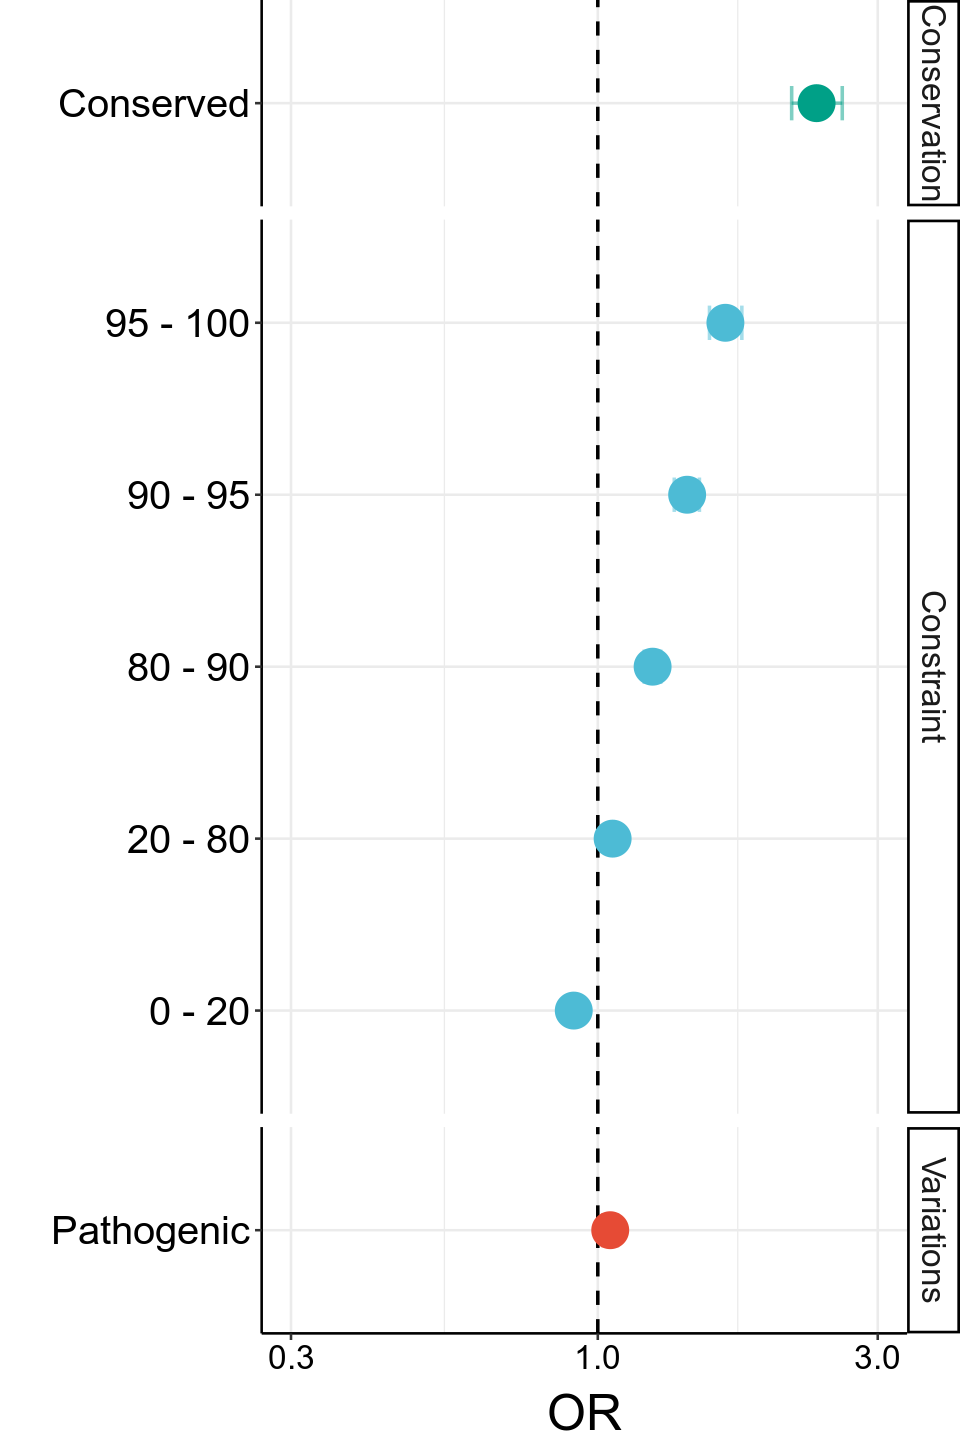

In [23]:
w = 8
h = 12

options(repr.plot.width=8, repr.plot.height=12)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))


data <- output_df
data$Cat <- gsub('bool|CCR', '', data$Cat)
data$Cat <- gsub('^_|_$', '', data$Cat)
data$Cat <- gsub('_', ' - ', data$Cat)

# data$Cat <- gsub('_', ' - ', data$Cat)
# data$Cat <- gsub('CCR', 'CCR : ', data$Cat)
data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ ., scales="free_y", space='free_y', ) + 
    xlab("OR") + ylab("") +

    scale_x_log10(limits = c(0.3,3)) +
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
    #     panel.grid.major = element_blank(), 
    #     panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=30),
        strip.text.y = element_text(size = 20)
    ) +
#    scale_color_npg()
    scale_color_manual(values=c(pal_npg("nrc")(10)[3], pal_npg("nrc")(10)[2], pal_npg("nrc")(10)[1]))

#     scale_color_manual(values=pal_npg("nrc")(length(unique(data$Cat))))
#     scale_y_discrete(labels=c(data$Cat))

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)


for (format in c('png', 'jpg')){
    for (dpi in c(150,300)){          
        output_path = sprintf("/gstock/EXOTIC/clean/FIGURES/2_CONST_ALT/odds_ratio_DPI_%s.%s", dpi, format)
        ggsave(output_path, dpi=dpi, width = w, height = h)
    }
}

p
data$Cat

Cat,OR,IC_low,IC_up,Pvalue,id,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Conserved,2.43,2.20,2.68,0.001,1,Conservation
Unconserved,0.41,0.37,0.45,0.001,2,Conservation
0 - 20,0.92,0.91,0.93,0.001,1,Constraint
20 - 80,1.06,1.05,1.06,0.001,2,Constraint
80 - 90,1.23,1.20,1.27,0.001,3,Constraint
90 - 95,1.40,1.33,1.47,0.001,4,Constraint
95 - 99,1.63,1.53,1.74,0.001,5,Constraint
99 - 100,1.63,1.37,1.96,0.001,6,Constraint
Benign,0.96,0.93,0.99,0.010,1,Variations


Warning message:
“Ignoring unknown aesthetics: x”


[1] "Conserved"   "Unconserved" "0 - 20"      "20 - 80"     "80 - 90"    
 [6] "90 - 95"     "95 - 99"     "99 - 100"    "Benign"      "Pathogenic"

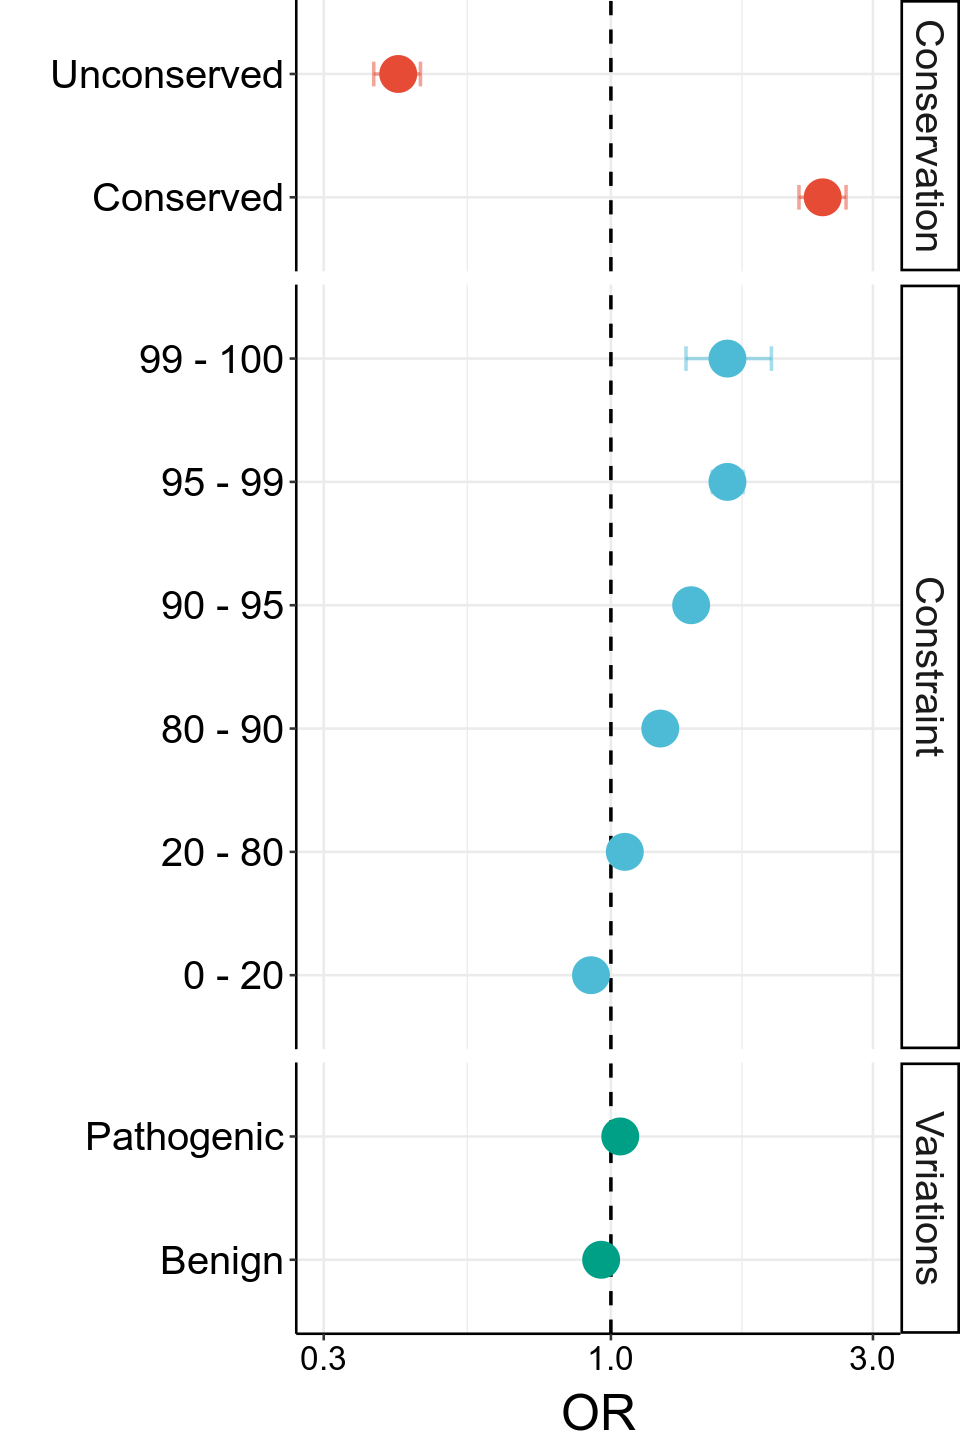

In [55]:
options(repr.plot.width=8, repr.plot.height=12)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))


data <- output_df
data$Cat <- gsub('bool|CCR', '', data$Cat)
data$Cat <- gsub('^_|_$', '', data$Cat)
data$Cat <- gsub('_', ' - ', data$Cat)

# data$Cat <- gsub('_', ' - ', data$Cat)
# data$Cat <- gsub('CCR', 'CCR : ', data$Cat)
data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ ., scales="free_y", space='free_y', ) + 
    xlab("OR") + ylab("") +

    scale_x_log10(limits = c(0.3,3)) +
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
    #     panel.grid.major = element_blank(), 
    #     panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=30)) +
   scale_color_npg()
#     scale_color_manual(values=pal_npg("nrc")(length(unique(data$Cat))))
#     scale_y_discrete(labels=c(data$Cat))

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
p
data$Cat

### Use function to compute OR for exon frequencies (Alt)

In [7]:
# alt_phylocsf_df  <- new_df_phylocsf[new_df_phylocsf$Alternative == TRUE, ]
alt_phylocsf_df  <- new_df_phylocsf

l_df <- list()
# alt_phylocsf_df
for (alt in c("Cat0020", "Cat2040", "Cat4060", "Cat6080", "Cat80100", 'Constitutive')) {
    l_df[[alt]] <- (compute_or(c('Conserved'), c(alt), alt_phylocsf_df, "Conservation"))
}
alt_phylocsf_df <- do.call(rbind, l_df)
alt_phylocsf_df <- cbind(newColName = rownames(alt_phylocsf_df), alt_phylocsf_df)
rownames(alt_phylocsf_df) <- 1:nrow(alt_phylocsf_df)
alt_phylocsf_df$newColName <- gsub('\\.[0-9]', '', alt_phylocsf_df$newColName)
alt_phylocsf_df

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(dep)` instead of `dep` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(cat)` instead of `cat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 0.29 (0.21-0.40, p<0.001)


Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 0.35 (0.29-0.41, p<0.001)


Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 0.62 (0.55-0.71, p<0.001)


Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 0.84 (0.72-0.98, p=0.031)


Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 1.21 (0.90-1.64, p=0.220)


Waiting for profiling to be done...



    explanatory                        OR
1 ConservedTRUE 2.36 (2.14-2.61, p<0.001)


,newColName,Cat,OR,IC_low,IC_up,Pvalue,id,group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Cat0020,Conserved,0.29,0.21,0.40,0.001,1,Conservation
2,Cat2040,Conserved,0.35,0.29,0.41,0.001,1,Conservation
3,Cat4060,Conserved,0.62,0.55,0.71,0.001,1,Conservation
4,Cat6080,Conserved,0.84,0.72,0.98,0.031,1,Conservation
5,Cat80100,Conserved,1.21,0.90,1.64,0.220,1,Conservation
6,Constitutive,Conserved,2.36,2.14,2.61,0.001,1,Conservation


In [8]:
# alt_ccrs_df_lite  <- ccrs_df[ccrs_df$Const_Alt == "Alt", ]
alt_ccrs_df  <- ccrs_df


l_df <- list()
# alt_phylocsf_df
for (alt in c("Cat0020", "Cat2040", "Cat4060", "Cat6080", "Cat80100", "Constitutive")) {
    l_df[[alt]] <- (compute_or(c('CCR_0_20_bool', 'CCR_20_80_bool', 'CCR_80_90_bool', 'CCR_90_95_bool', 'CCR_95_100_bool'), c(alt), alt_ccrs_df, "Constraint"))
}
alt_ccrs_df_lite <- do.call(rbind, l_df)
alt_ccrs_df_lite <- cbind(newColName = rownames(alt_ccrs_df_lite), alt_ccrs_df_lite)
rownames(alt_ccrs_df_lite) <- 1:nrow(alt_ccrs_df_lite)
alt_ccrs_df_lite$newColName <- gsub('\\.[0-9]', '', alt_ccrs_df_lite$newColName)
alt_ccrs_df_lite

Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 1.10 (1.07-1.13, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 0.93 (0.90-0.96, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 0.77 (0.69-0.86, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 0.81 (0.68-0.97, p=0.025)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 0.78 (0.61-0.97, p=0.035)


Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 1.10 (1.08-1.11, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 0.94 (0.93-0.96, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 0.78 (0.74-0.83, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 0.65 (0.59-0.71, p<0.001)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 0.51 (0.44-0.58, p<0.001)


Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 1.08 (1.07-1.09, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 0.95 (0.94-0.96, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 0.82 (0.79-0.86, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 0.74 (0.69-0.79, p<0.001)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 0.61 (0.56-0.67, p<0.001)


Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 1.03 (1.02-1.05, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 0.98 (0.96-0.99, p=0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 0.93 (0.89-0.98, p=0.007)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 0.87 (0.80-0.94, p=0.001)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 0.88 (0.79-0.97, p=0.016)


Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 0.98 (0.96-1.00, p=0.047)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 1.02 (0.99-1.04, p=0.160)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 1.08 (1.00-1.16, p=0.055)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 1.02 (0.90-1.16, p=0.722)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 1.02 (0.87-1.19, p=0.793)


Waiting for profiling to be done...



        explanatory                        OR
1 CCR_0_20_boolTRUE 0.91 (0.91-0.92, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_20_80_boolTRUE 1.06 (1.05-1.07, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_80_90_boolTRUE 1.24 (1.20-1.28, p<0.001)


Waiting for profiling to be done...



         explanatory                        OR
1 CCR_90_95_boolTRUE 1.42 (1.35-1.49, p<0.001)


Waiting for profiling to be done...



          explanatory                        OR
1 CCR_95_100_boolTRUE 1.65 (1.55-1.76, p<0.001)


,newColName,Cat,OR,IC_low,IC_up,Pvalue,id,group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Cat0020,CCR_0_20_bool,1.10,1.07,1.13,0.001,1,Constraint
2,Cat0020,CCR_20_80_bool,0.93,0.90,0.96,0.001,2,Constraint
3,Cat0020,CCR_80_90_bool,0.77,0.69,0.86,0.001,3,Constraint
4,Cat0020,CCR_90_95_bool,0.81,0.68,0.97,0.025,4,Constraint
5,Cat0020,CCR_95_100_bool,0.78,0.61,0.97,0.035,5,Constraint
6,Cat2040,CCR_0_20_bool,1.10,1.08,1.11,0.001,1,Constraint
7,Cat2040,CCR_20_80_bool,0.94,0.93,0.96,0.001,2,Constraint
8,Cat2040,CCR_80_90_bool,0.78,0.74,0.83,0.001,3,Constraint
9,Cat2040,CCR_90_95_bool,0.65,0.59,0.71,0.001,4,Constraint


In [9]:
# alt_merge_df_variants  <- merge_df_variants[merge_df_variants$Const_Alt == "Alt", ]
alt_merge_df_variants  <- merge_df_variants


l_df <- list()
# alt_phylocsf_df
for (alt in c("Cat0020", "Cat2040", "Cat4060", "Cat6080", "Cat80100", "Constitutive")) {
    l_df[[alt]] <- (compute_or(c('Pathogenic'), c(alt), alt_merge_df_variants, "Variations"))
}
alt_merge_df_variants <- do.call(rbind, l_df)
alt_merge_df_variants <- cbind(newColName = rownames(alt_merge_df_variants), alt_merge_df_variants)
rownames(alt_merge_df_variants) <- 1:nrow(alt_merge_df_variants)
alt_merge_df_variants$newColName <- gsub('\\.[0-9]', '', alt_merge_df_variants$newColName)
alt_merge_df_variants

Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 1.19 (1.06-1.34, p=0.003)


Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 0.96 (0.91-1.02, p=0.159)


Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 1.09 (1.04-1.14, p<0.001)


Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 1.15 (1.10-1.20, p<0.001)


Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 0.69 (0.62-0.77, p<0.001)


Waiting for profiling to be done...



     explanatory                        OR
1 PathogenicTRUE 0.94 (0.91-0.97, p<0.001)


,newColName,Cat,OR,IC_low,IC_up,Pvalue,id,group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Cat0020,Pathogenic,1.19,1.06,1.34,0.003,1,Variations
2,Cat2040,Pathogenic,0.96,0.91,1.02,0.159,1,Variations
3,Cat4060,Pathogenic,1.09,1.04,1.14,0.001,1,Variations
4,Cat6080,Pathogenic,1.15,1.10,1.20,0.001,1,Variations
5,Cat80100,Pathogenic,0.69,0.62,0.77,0.001,1,Variations
6,Constitutive,Pathogenic,0.94,0.91,0.97,0.001,1,Variations


Warning message:
“Ignoring unknown aesthetics: x”


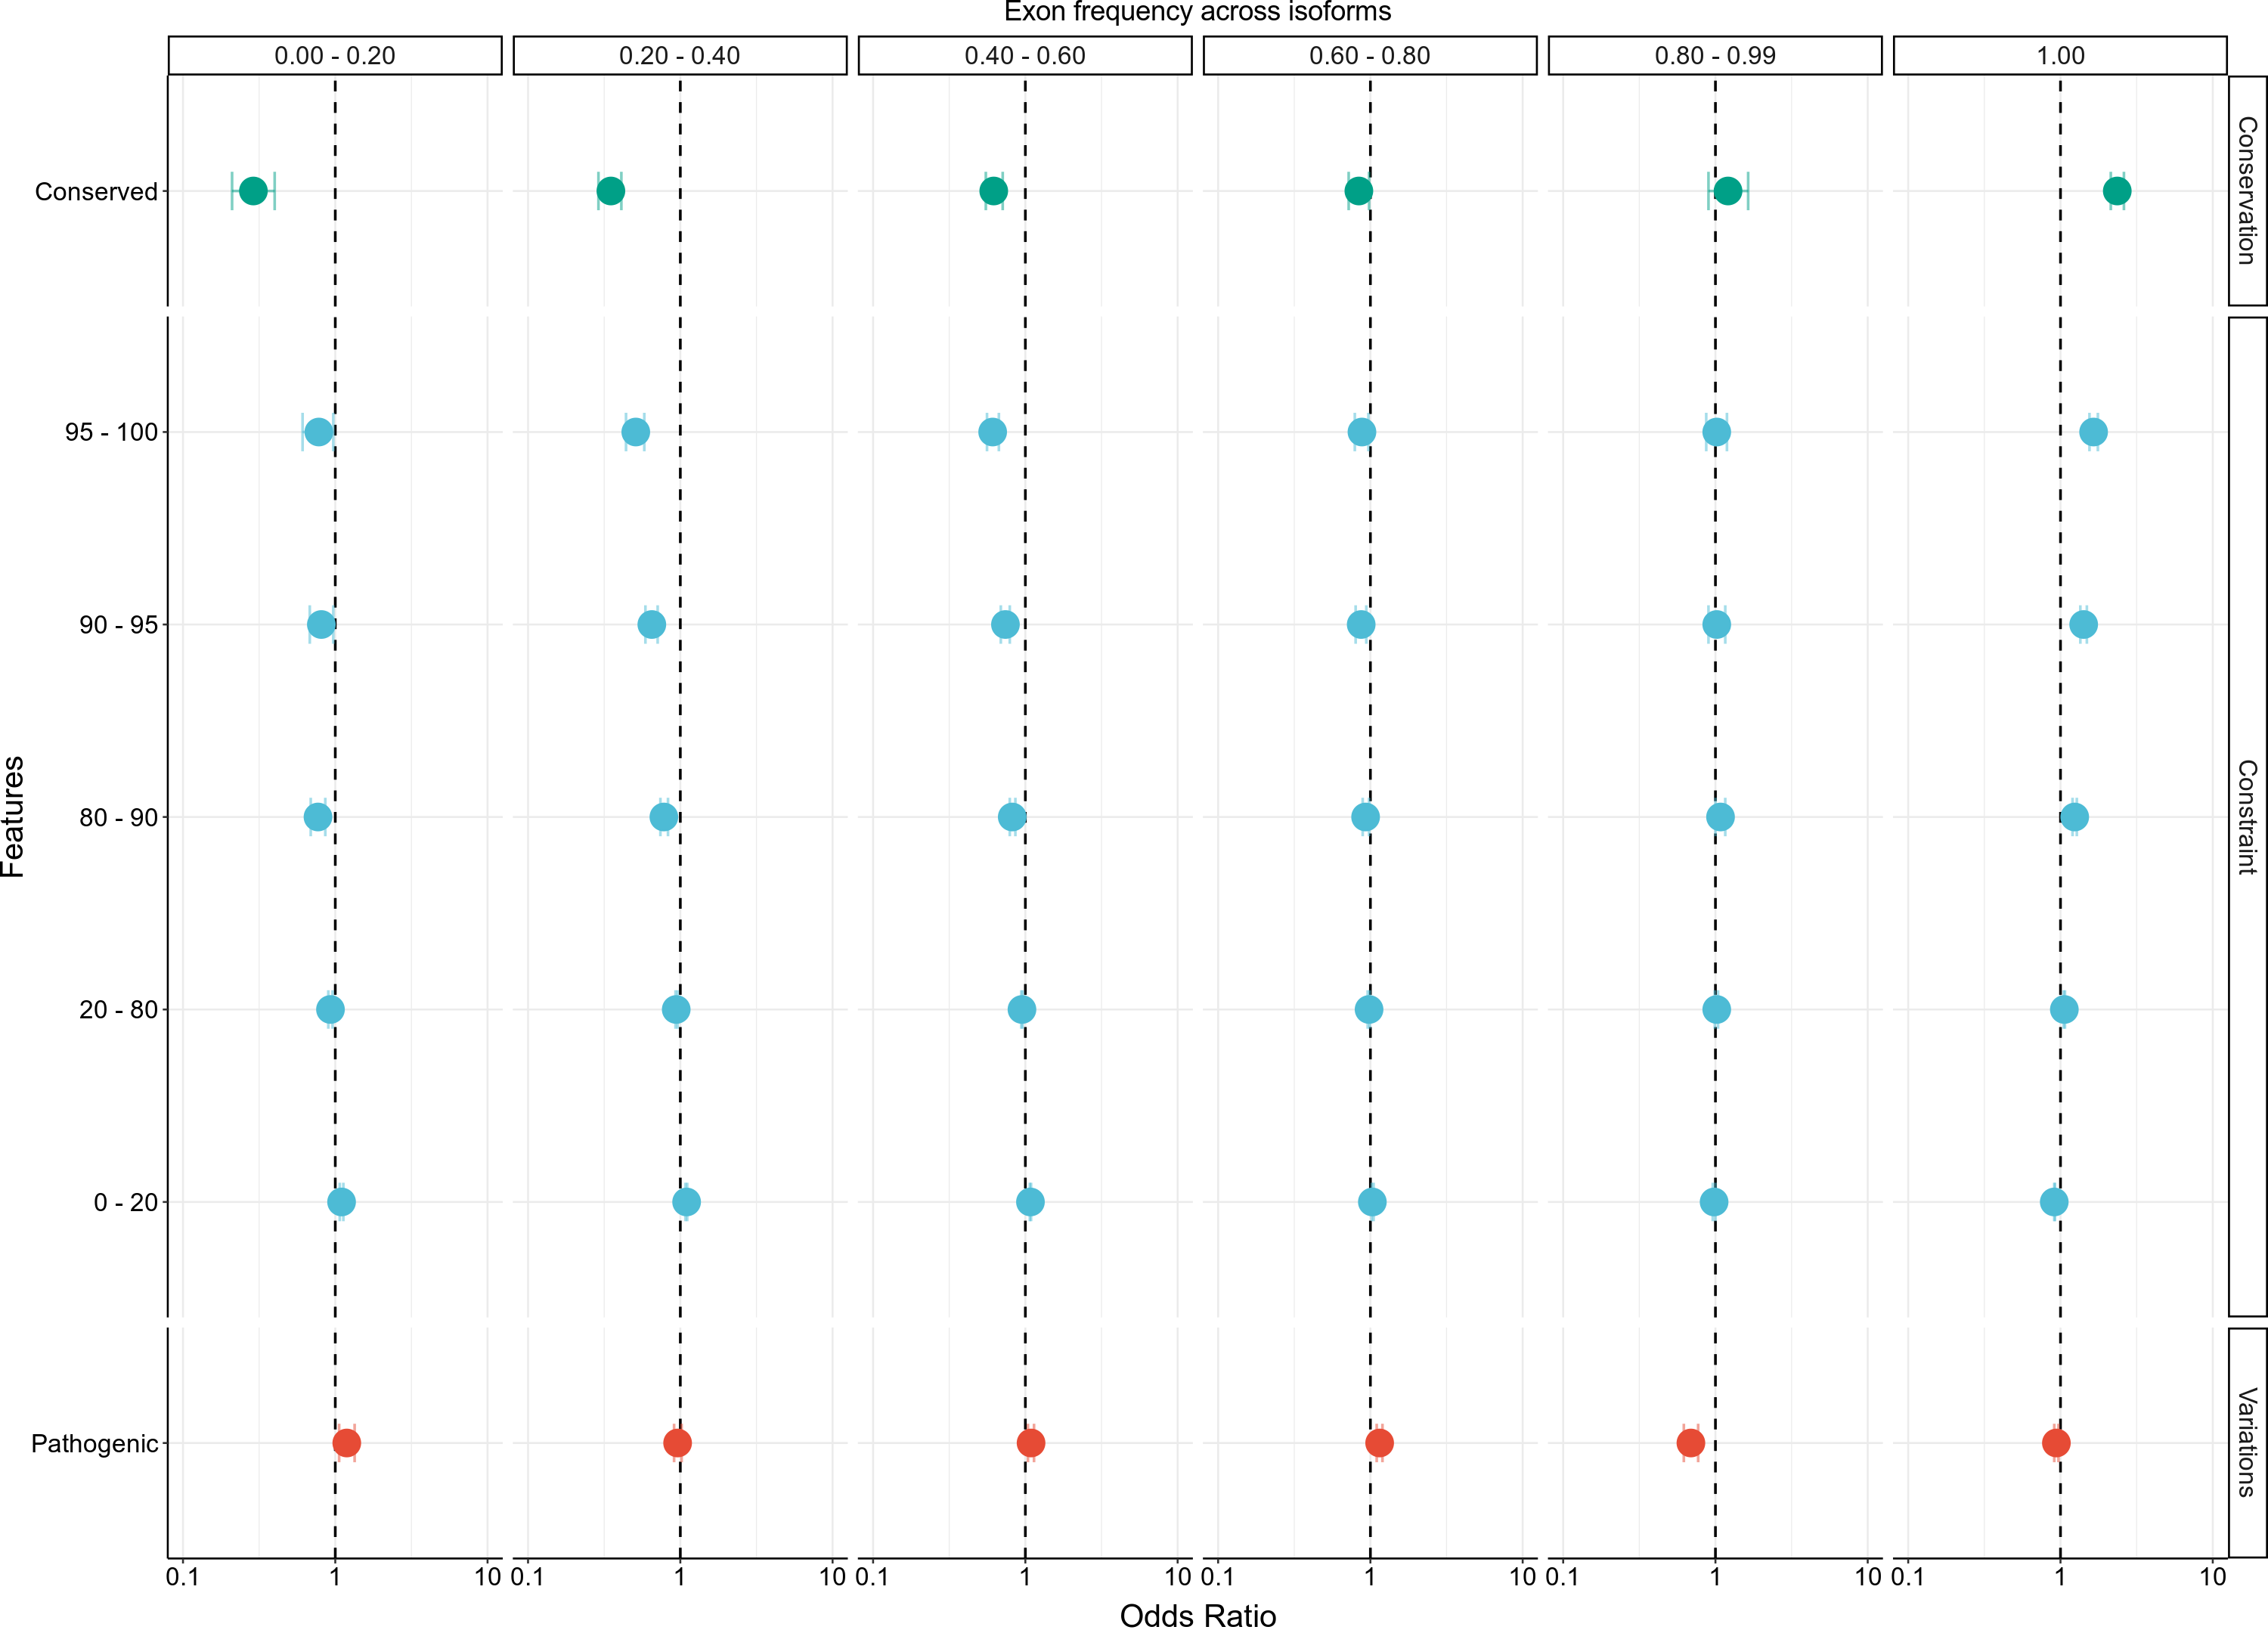

In [16]:
# output_df_alt <- rbind(alt_phylocsf_df, alt_ccrs_df_lite, alt_merge_df_variants)
w = 25
h = 18

options(repr.plot.width=w, repr.plot.height=h)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))


data <- output_df_alt
data$Cat <- gsub('bool|CCR', '', data$Cat)
data$Cat <- gsub('^_|_$', '', data$Cat)
data$Cat <- gsub('_', ' - ', data$Cat)
data$newColName <- gsub('Cat', '', data$newColName)
data$newColName <- gsub('0020', '0.00 - 0.20', data$newColName)
data$newColName <- gsub('2040', '0.20 - 0.40', data$newColName)
data$newColName <- gsub('4060', '0.40 - 0.60', data$newColName)
data$newColName <- gsub('6080', '0.60 - 0.80', data$newColName)
data$newColName <- gsub('80100', '0.80 - 0.99', data$newColName)
data$newColName <- gsub('Constitutive', '1.00', data$newColName)

# data$newColName <- gsub('^(.{2})(.*)$', '\\1 - \\2', data$newColName)
# names(new_df_phylocsf)[names(new_df_phylocsf) == 'Cat80100'] <- 'Alt (0.80 - 0.99)'
# names(new_df_phylocsf)[names(new_df_phylocsf) == 'Constitutive'] <- 'Const (1.00)'

# data
# data$Cat <- gsub('_', ' - ', data$Cat)
# data$Cat <- gsub('CCR', 'CCR : ', data$Cat)
# data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ newColName, scales="free", space='free') + 
   labs(title="Exon frequency across isoforms", y="Features", x="Odds Ratio") + 

    scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
    theme(
        plot.title=element_text(hjust=0.5, size=22),
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
        legend.position = "none", 
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=25),
        strip.text.y = element_text(size = 20)
    ) +
#    scale_color_npg()
    scale_color_manual(values=c(pal_npg("nrc")(10)[3], pal_npg("nrc")(10)[2], pal_npg("nrc")(10)[1]))

# jpeg("/gstock/EXOTIC/clean/FIGURES/1_circular_barplot.jpg", width = 7000, height = 5000, res=300)
for (format in c('png', 'jpg')){
    for (dpi in c(150,300)){          
        output_path = sprintf("/gstock/EXOTIC/clean/FIGURES/2_CONST_ALT/odds_ratio_alt_DPI_%s.%s", dpi, format)
        ggsave(output_path, dpi=dpi, width = w, height = h)
    }
}
p


Warning message:
“Ignoring unknown aesthetics: x”
Warning message:
“Removed 3 rows containing missing values (geom_errorbarh).”


[1] "Conserved"   "Unconserved" "Conserved"   "Unconserved" "Conserved"  
 [6] "Unconserved" "Conserved"   "Unconserved" "Conserved"   "Unconserved"
[11] "0 - 20"      "20 - 80"     "80 - 90"     "90 - 95"     "95 - 99"    
[16] "99 - 100"    "0 - 20"      "20 - 80"     "80 - 90"     "90 - 95"    
[21] "95 - 99"     "99 - 100"    "0 - 20"      "20 - 80"     "80 - 90"    
[26] "90 - 95"     "95 - 99"     "99 - 100"    "0 - 20"      "20 - 80"    
[31] "80 - 90"     "90 - 95"     "95 - 99"     "99 - 100"    "0 - 20"     
[36] "20 - 80"     "80 - 90"     "90 - 95"     "95 - 99"     "99 - 100"   
[41] "Pathogenic"  "Benign"      "Pathogenic"  "Benign"      "Pathogenic" 
[46] "Benign"      "Pathogenic"  "Benign"      "Pathogenic"  "Benign"

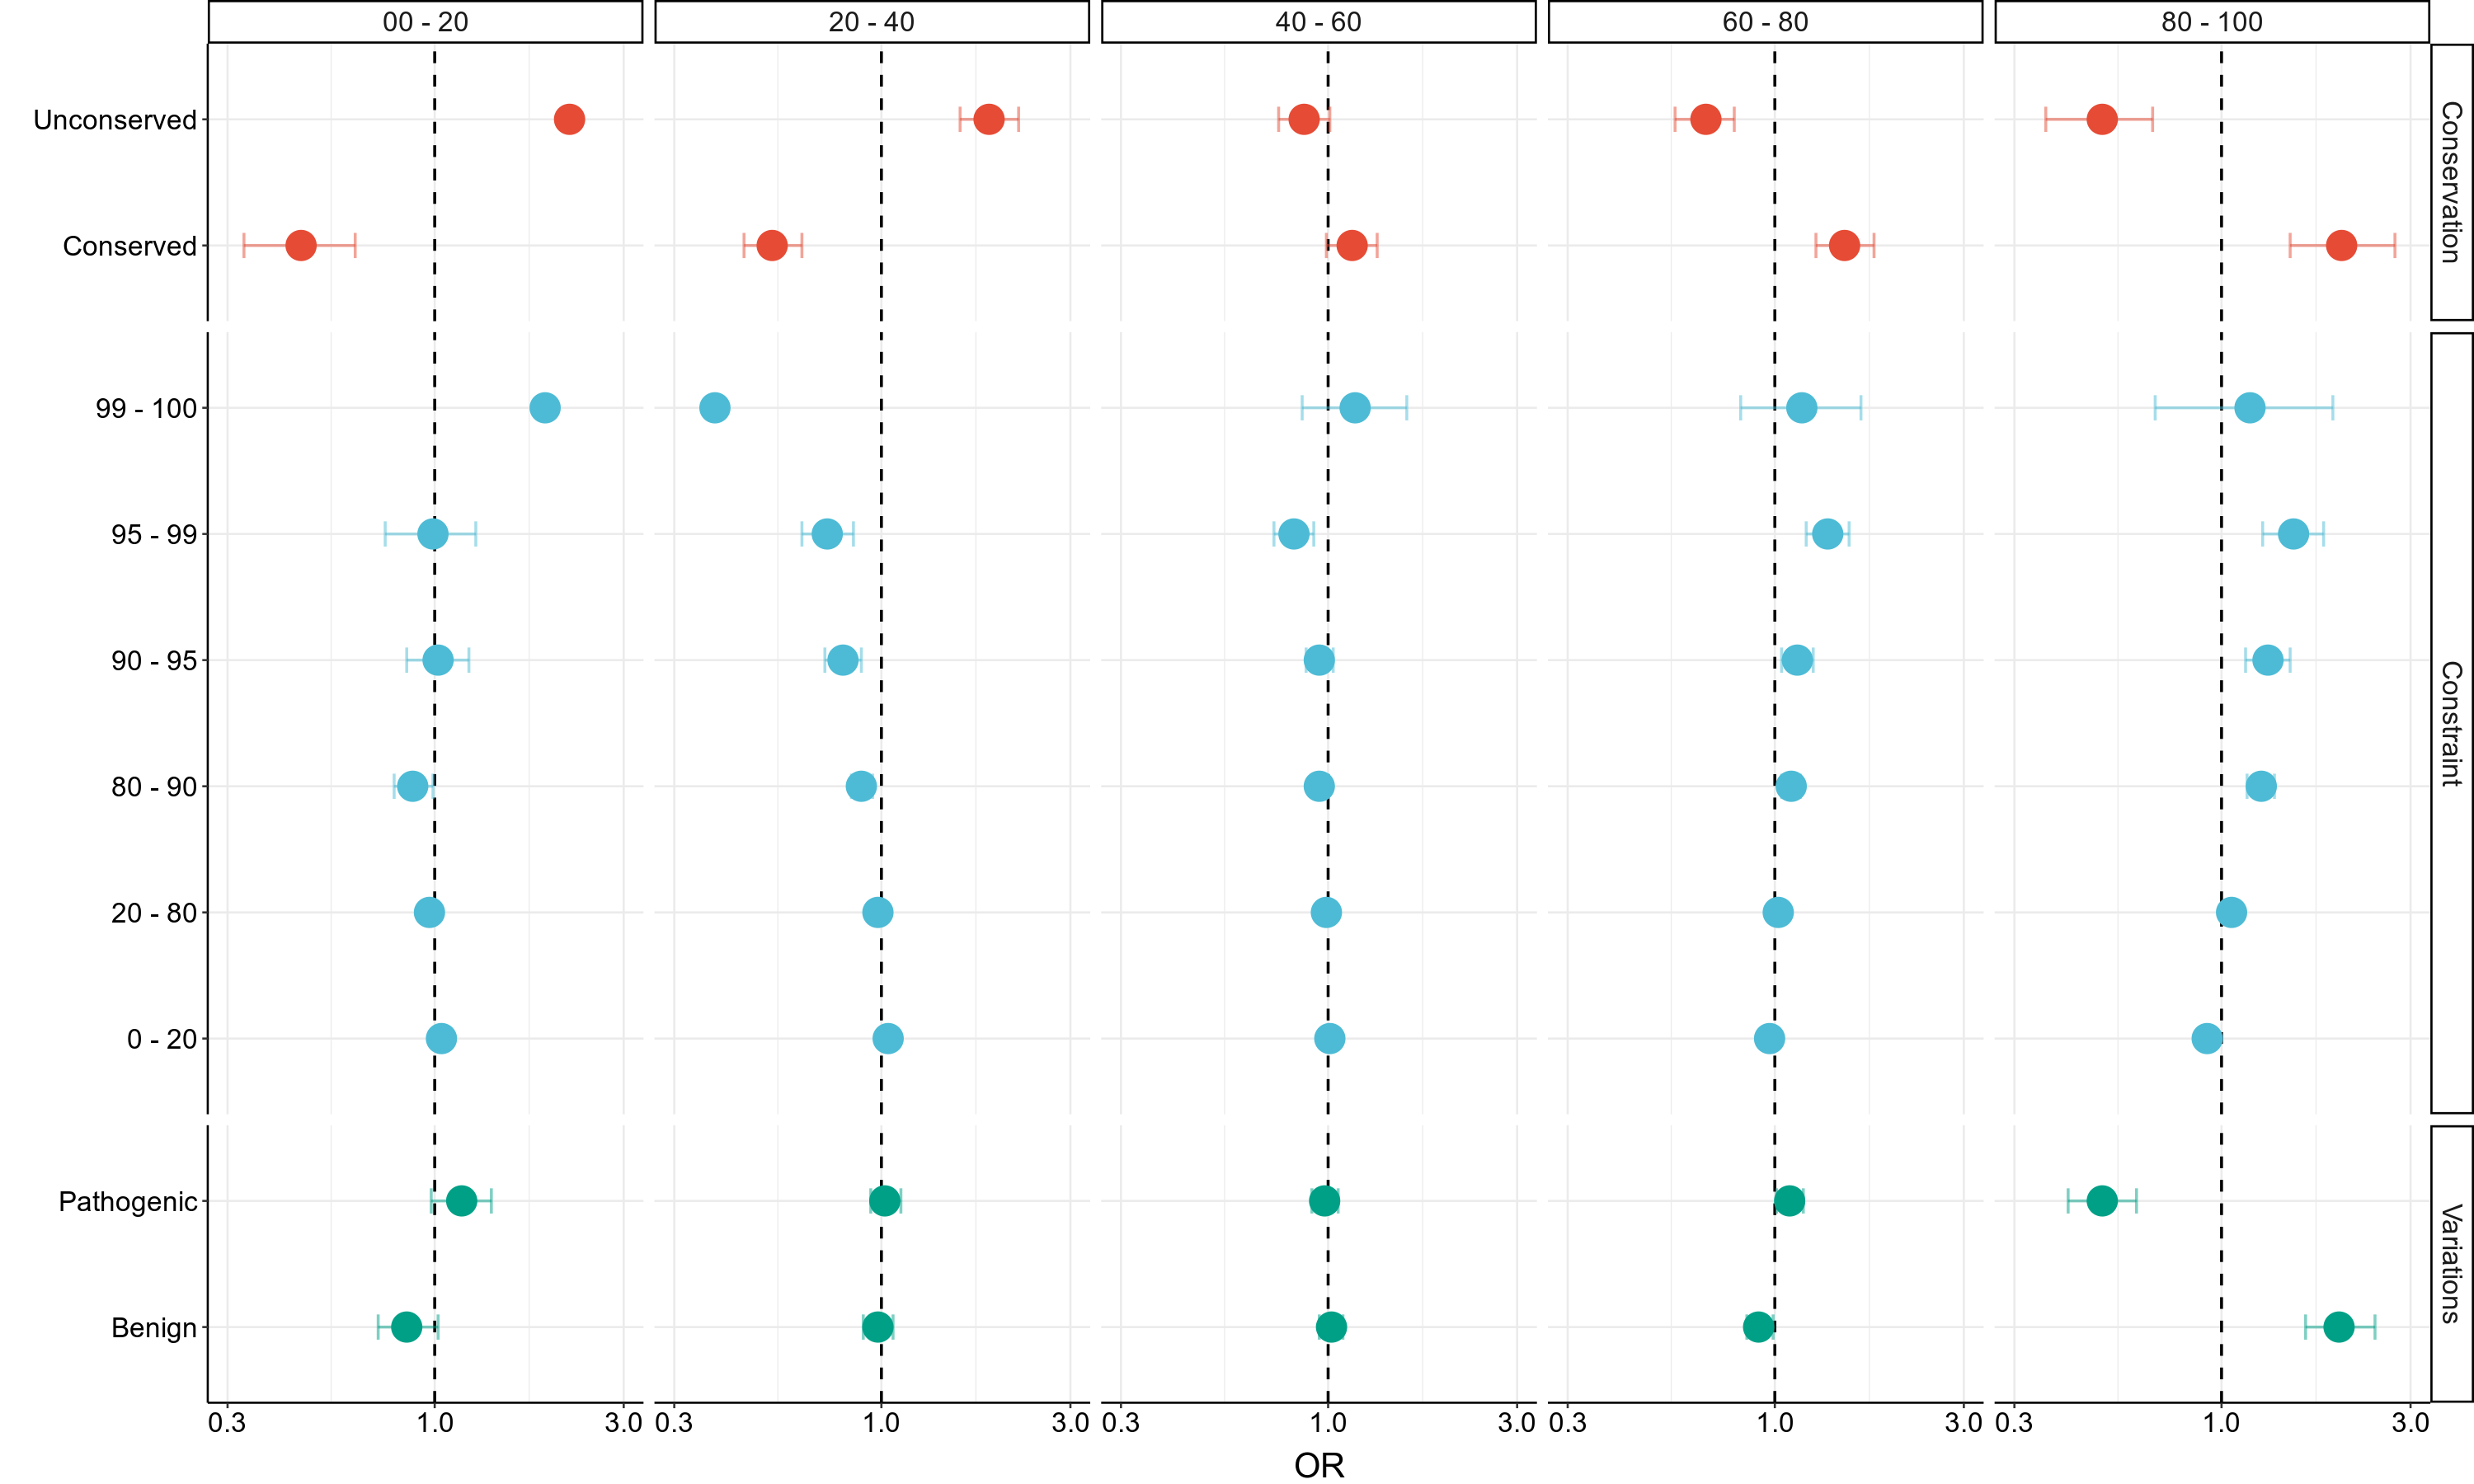

In [647]:

options(repr.plot.width=25, repr.plot.height=15)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))


data <- output_df_alt
data$Cat <- gsub('bool|CCR', '', data$Cat)
data$Cat <- gsub('^_|_$', '', data$Cat)
data$Cat <- gsub('_', ' - ', data$Cat)
data$newColName <- gsub('Cat', '', data$newColName)
data$newColName <- gsub('^(.{2})(.*)$', '\\1 - \\2', data$newColName)



# data$Cat <- gsub('_', ' - ', data$Cat)
# data$Cat <- gsub('CCR', 'CCR : ', data$Cat)
# data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ newColName, scales="free", space='free') + 
    xlab("OR") + ylab("") +

    scale_x_log10(limits = c(0.3,3)) +
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
    #     panel.grid.major = element_blank(), 
    #     panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        strip.text.y = element_text(size = 20)
    ) +
#    scale_color_npg()
    scale_color_manual(values=c(pal_npg("nrc")(10)[3], pal_npg("nrc")(10)[2], pal_npg("nrc")(10)[1]))

#     scale_color_manual(values=pal_npg("nrc")(length(unique(data$Cat))))
#     scale_y_discrete(labels=c(data$Cat))

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
p
data$Cat

In [86]:
tmp_clinvar_ccrs_path = "/gstock/EXOTIC/data/VARIATIONS/Variants_CCRS_Rdata.parquet"
merge_ccrs_variants = read_parquet(tmp_clinvar_ccrs_path)
merge_ccrs_variants <- merge_ccrs_variants %>% mutate_if(is.character, as.factor)
merge_ccrs_variants_lite <- merge_ccrs_variants %>% group_by(CCRS_bins) %>% sample_n(500)

head(merge_ccrs_variants_lite$CCRS_bins)
unique(merge_ccrs_variants_lite$CCRS_bins)


[1] 0 - 20 0 - 20 0 - 20 0 - 20 0 - 20 0 - 20
Levels: 0 - 20 20 - 80 80 - 90 90 - 95 95 - 99 99 - 100

[1] 0 - 20   20 - 80  80 - 90  90 - 95  95 - 99  99 - 100
Levels: 0 - 20 20 - 80 80 - 90 90 - 95 95 - 99 99 - 100

In [93]:
l_df <- list()
# alt_phylocsf_df
for (cat in c("CCR_0_20_bool", "CCR_20_80_bool", "CCR_80_90_bool", "CCR_90_95_bool", "CCR_95_99_bool", "CCR_99_100_bool")) {
    print(cat)
    merge_ccrs_variants_lite_tmp  <- merge_ccrs_variants_lite[merge_ccrs_variants_lite[[cat]] == TRUE,]
    l_df[[cat]] <- (compute_or(c('Pathogenic', 'Benign'), c("Const_Alt"), merge_ccrs_variants_lite_tmp, "Variations"))
}

alt_merge_df_variants <- do.call(rbind, l_df)
alt_merge_df_variants <- cbind(newColName = rownames(alt_merge_df_variants), alt_merge_df_variants)
rownames(alt_merge_df_variants) <- 1:nrow(alt_merge_df_variants)
alt_merge_df_variants$newColName <- gsub('\\.[0-9]', '', alt_merge_df_variants$newColName)
alt_merge_df_variants

[1] "CCR_0_20_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "CCR_20_80_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "CCR_80_90_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "CCR_90_95_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "CCR_95_99_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



[1] "CCR_99_100_bool"


Waiting for profiling to be done...

Waiting for profiling to be done...



,newColName,Cat,OR,IC_low,IC_up,Pvalue,id,group
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CCR_0_20_bool,Pathogenic,1.87,0.36,13.61,0.471,1,Variations
2,CCR_0_20_bool,Benign,0.53,0.07,2.76,0.471,2,Variations
3,CCR_20_80_bool,Pathogenic,0.80,0.31,2.08,0.639,1,Variations
4,CCR_20_80_bool,Benign,1.25,0.48,3.26,0.639,2,Variations
5,CCR_80_90_bool,Pathogenic,1.20,0.67,2.19,0.544,1,Variations
6,CCR_80_90_bool,Benign,0.83,0.46,1.49,0.544,2,Variations
7,CCR_90_95_bool,Pathogenic,0.69,0.37,1.27,0.227,1,Variations
8,CCR_90_95_bool,Benign,1.46,0.79,2.68,0.227,2,Variations
9,CCR_95_99_bool,Pathogenic,0.68,0.42,1.13,0.134,1,Variations


Warning message:
“Ignoring unknown aesthetics: x”


[1] "Pathogenic" "Benign"     "Pathogenic" "Benign"     "Pathogenic"
 [6] "Benign"     "Pathogenic" "Benign"     "Pathogenic" "Benign"    
[11] "Pathogenic" "Benign"

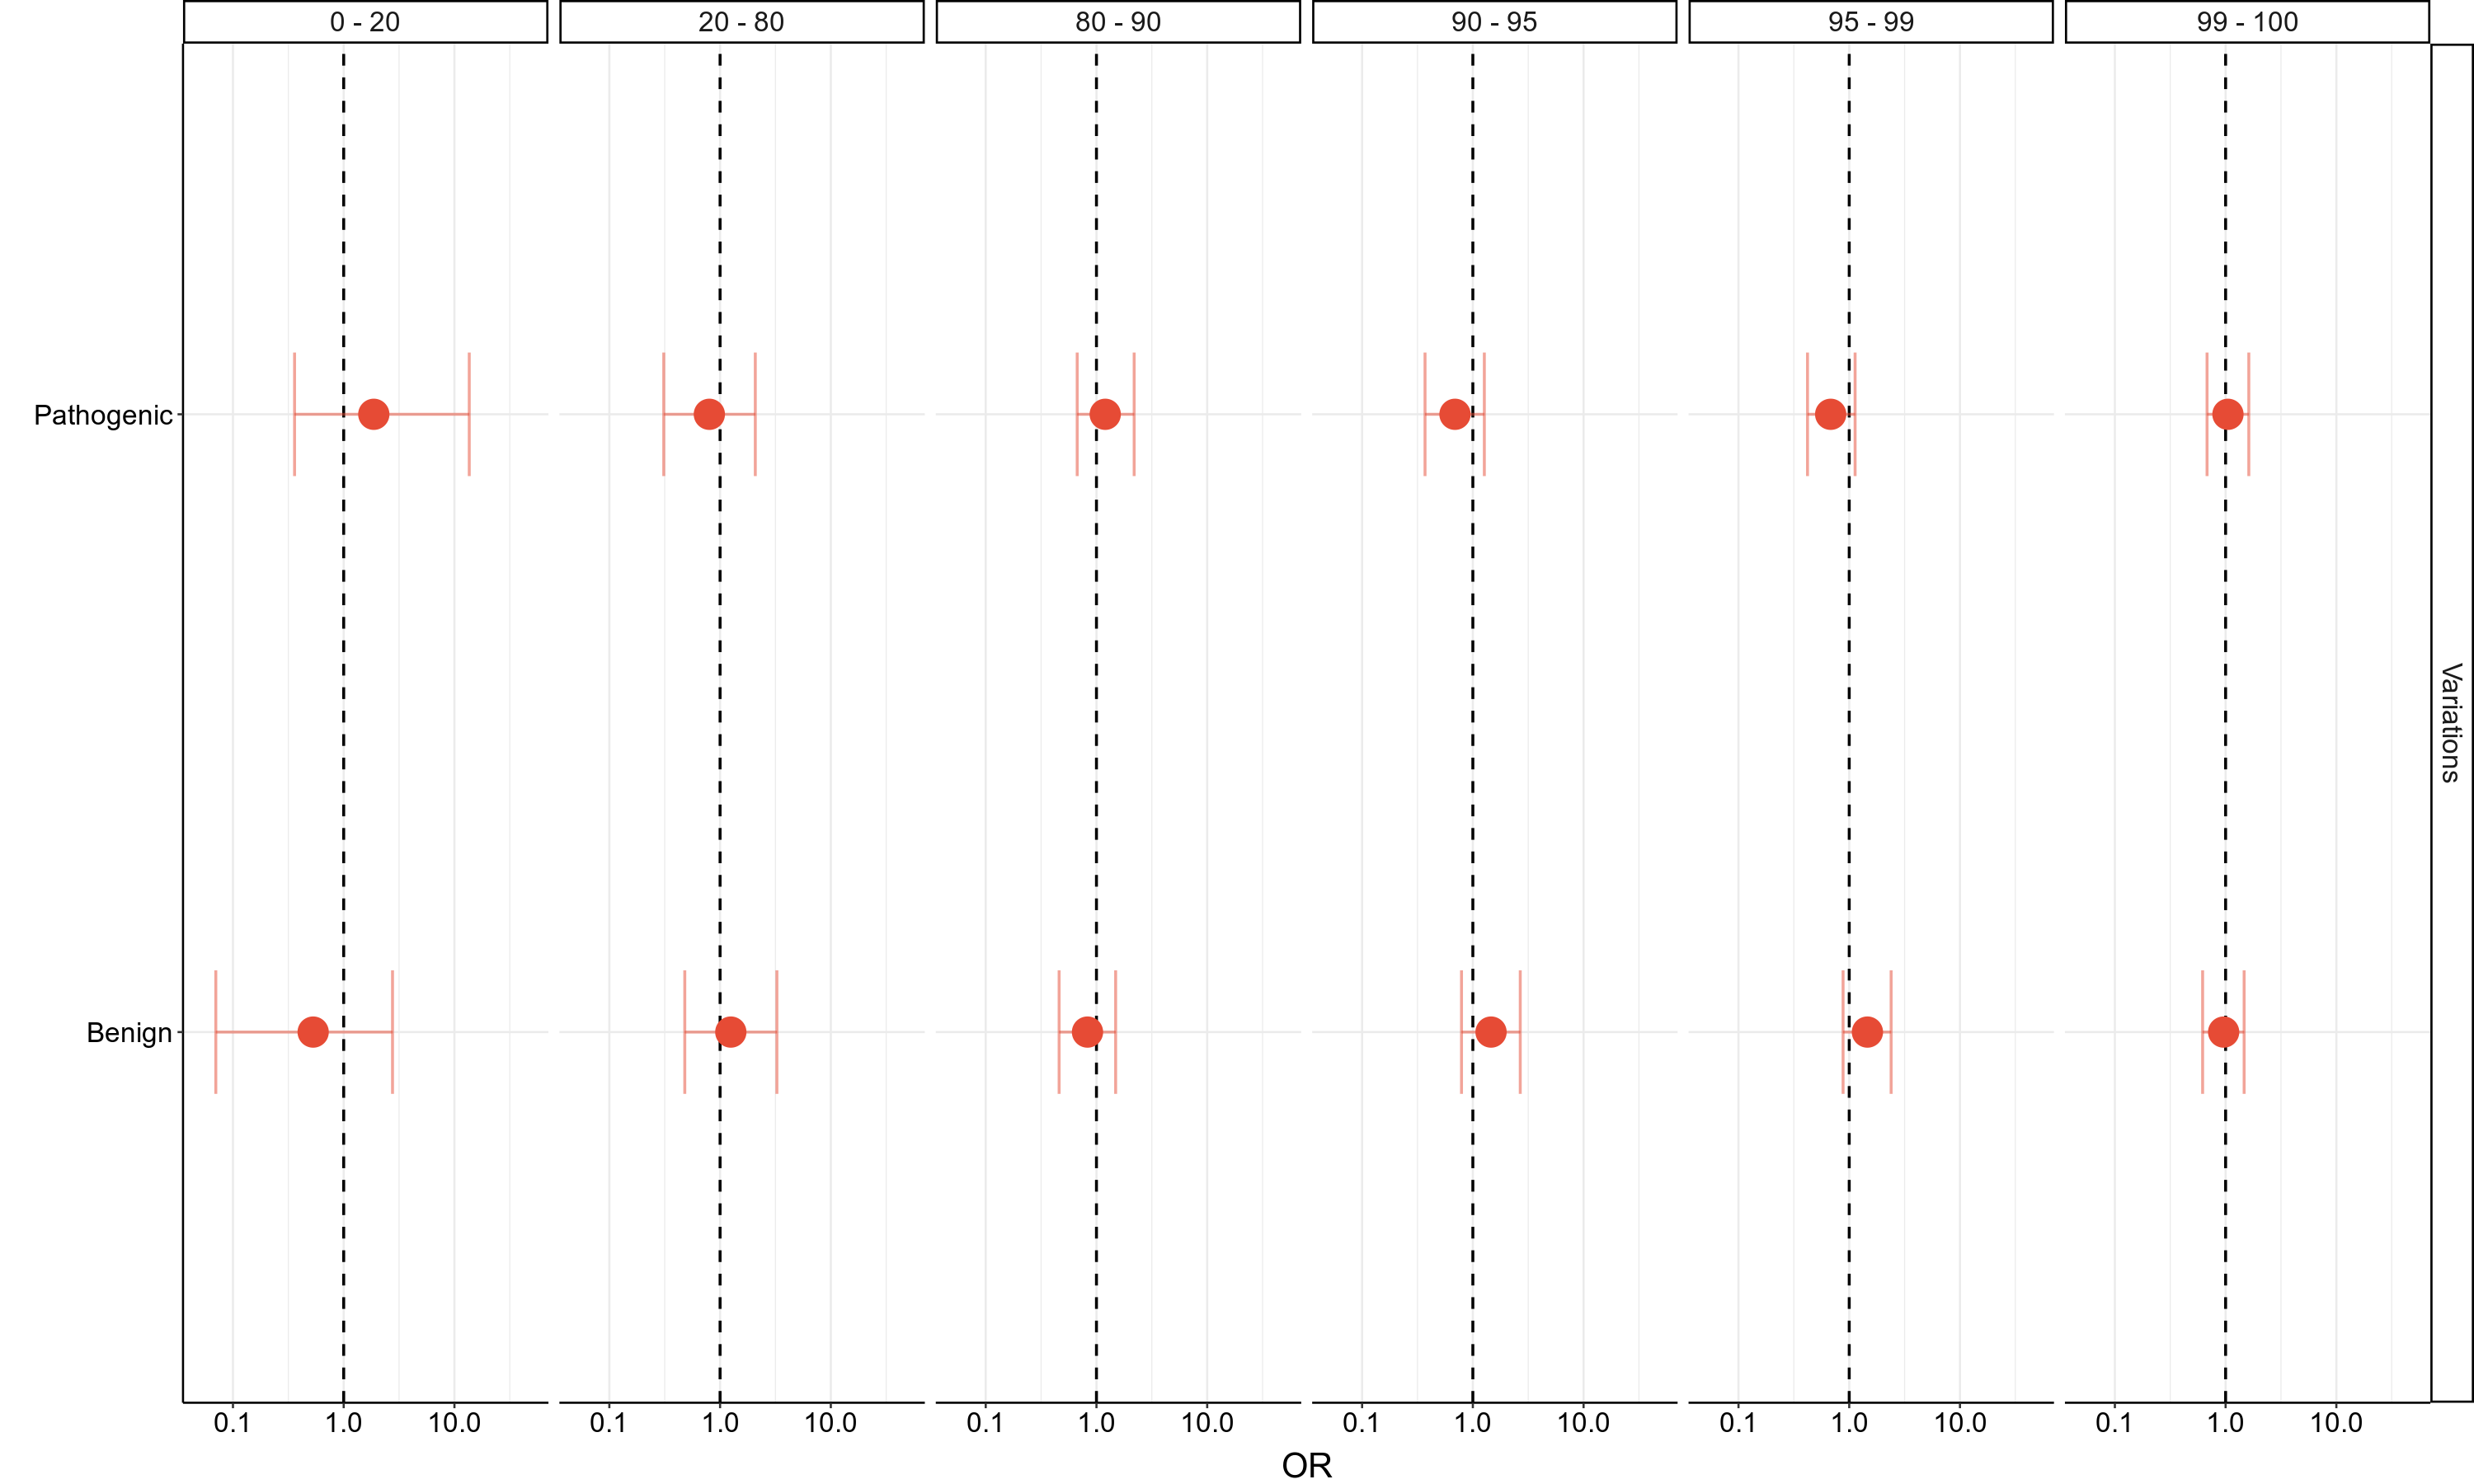

In [95]:

options(repr.plot.width=25, repr.plot.height=15)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))


data <- alt_merge_df_variants
data$newColName <- gsub('bool|CCR', '', data$newColName)
data$newColName <- gsub('^_|_$', '', data$newColName)
data$newColName <- gsub('_', ' - ', data$newColName)
# data$newColName <- gsub('Cat', '', data$newColName)
# data$newColName <- gsub('^(.{2})(.*)$', '\\1 - \\2', data$newColName)



# data$Cat <- gsub('_', ' - ', data$Cat)
# data$Cat <- gsub('CCR', 'CCR : ', data$Cat)
# data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ newColName, scales="free", space='free') + 
    xlab("OR") + ylab("") +

    scale_x_log10(limits = c(0.05,50)) +
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
    #     panel.grid.major = element_blank(), 
    #     panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=25)) +
   scale_color_npg()
#     scale_color_manual(values=pal_npg("nrc")(length(unique(data$Cat))))
#     scale_y_discrete(labels=c(data$Cat))

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
p
data$Cat

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

Warning message:
“Ignoring unknown parameters: width”
Warning message in log(x, base):
“production de NaN”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in log(x, base):
“production de NaN”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


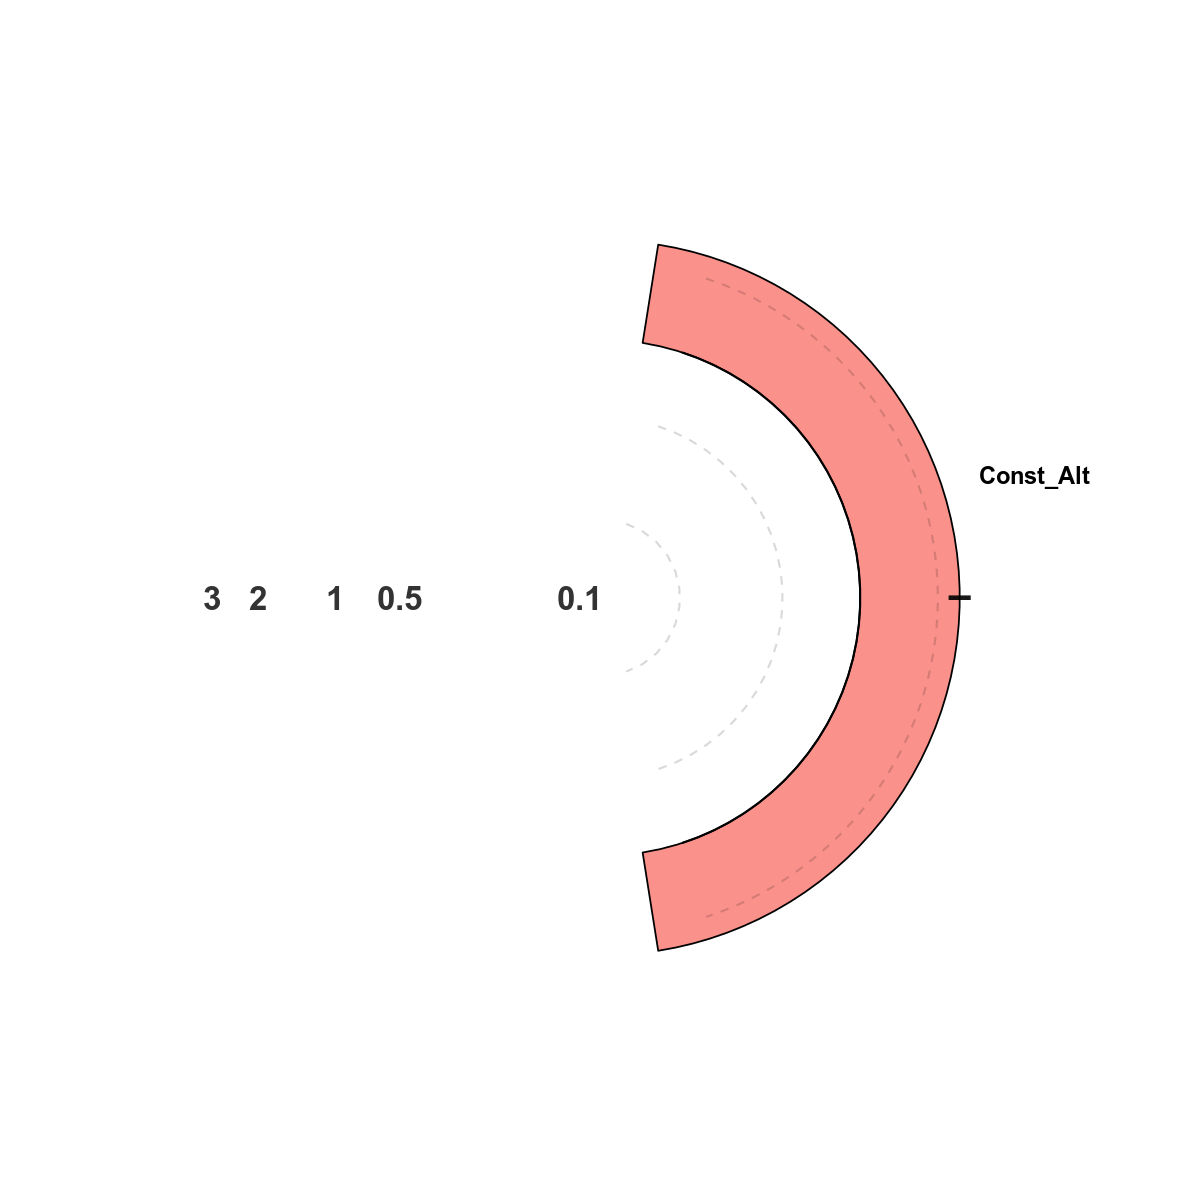

In [327]:
# library('readxl') library('tidyverse')
library("ggplot2")
library("dplyr")

data <- output_df

empty_bar <- 1
nObsType <- 1

to_add <- data.frame(matrix(NA, 1, ncol(data)))
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each = empty_bar * nObsType)
data <- rbind(data, to_add)
# data <- data %>% arrange(group, Tissue)
data$id <- rep(seq(1, nrow(data)/nObsType), each = nObsType)
# data

label_data <- data %>% group_by(id, Cat) %>% summarize(tot = sum(OR))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id - 0.5)/number_of_bar
label_data$hjust <- ifelse(angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle + 180, angle)

base_data <- data %>% group_by(group) %>% summarize(start = min(id), end = max(id) - empty_bar) %>% rowwise() %>% mutate(title = mean(c(start, end)))


grid_data <- base_data
grid_data$end <- grid_data$end[c(nrow(grid_data), 1:nrow(grid_data) - 1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1, ]

# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=OR)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
  
    geom_bar(aes(x=as.factor(id), y=OR, fill=group), stat="identity",  colour='black', alpha=0.8)  +
    geom_linerange( aes(x=as.factor(id), y=OR, ymin=IC_low, ymax=IC_up), width=0.4, colour="black", alpha=0.9, size=1.3) +
#     scale_y_continuous(trans='log10') +
  scale_y_log10(limits = c(0.1,10))+
# scale_fill_manual(values=data$Color) + 
   
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
#   geom_segment(data=grid_data, aes(x = end, y = 4, xend = start, yend = 4), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 3, xend = start, yend = 3), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 2, xend = start, yend = 2), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 1, xend = start, yend = 1), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +

  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),5), y = c(0.1, 0.5, 1, 2, 3), label = c("0.1", "0.5", "1", "2", "3") , color="black", alpha=0.8, size=7 , angle=0, fontface="bold", hjust=1)  +
#   annotate("text", x = rep(max(data$id),1), y = c(3.6), label = c("Nb exons\n(log10)") , color="black", alpha=0.8, size=8 , angle=0, fontface="bold", hjust=1)  +
#   ylim(-2,2) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  geom_text(data=label_data, aes(x=id-0.1, y=tot+1, label=Cat, hjust=hjust), color="black", fontface="bold", size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
    geom_segment(data=base_data, aes(x = start -0.4, y = - 0.15, xend = end + 0.4, yend = -0.15), colour = "black", alpha=0.7, size=0.6 , inherit.aes = FALSE)  +
    geom_segment(data=base_data, aes(x = start -0.4, y = 0.2, xend = end + 0.4, yend = 0.2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +
    geom_segment(data=base_data, aes(x = start -0.4, y = 0.5,  xend = end + 0.4, yend = 0.5), colour = "black",  alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +

    geom_segment(data=base_data, aes(x = start -0.4, y = 1,  xend = end + 0.4, yend = 1), colour = "black", alpha=1, size=0.6 , inherit.aes = FALSE  )  +
    geom_segment(data=base_data, aes(x = start -0.4, y = 2, xend = end + 0.4, yend = 2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE  , linetype=2) + 
geom_segment(data=base_data, aes(x = start, y = 3, xend = end, yend = 3), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  
#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
p

In [ ]:
library(ggplo2)
ggplot(df, aes(Group,m,fill=Group)) + 
  geom_bar(stat="identity", color="black", 
           position=position_dodge()) +
  geom_errorbar(aes(ymin=m-stdv, ymax=m+stdv), width=.2,
                position=position_dodge(.9))

In [293]:
tmp_phylocsf

Gene,ranges,phyloCSF_score,Ratio_num,Unconserved,Standard,Conserved,Constitutive,Alternative,Const_Alt,Cat80100,Cat6080,Cat4060,Cat2040,Cat0020
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,9247569-9247680,-262.0118,1.0000000,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
A2ML1,9002265-9002355,-128.3333,1.0000000,TRUE,FALSE,FALSE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AAR2,34827791-34828547,2694.8294,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
AATK,79094001-79096623,5871.9743,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139902868-139903074,1083.4374,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139907164-139907377,1188.0156,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139907454-139907770,1719.5819,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139910127-139910323,1109.4903,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE
ABCA2,139911372-139911576,1148.3248,1.0000000,FALSE,FALSE,TRUE,TRUE,FALSE,Const,FALSE,FALSE,FALSE,FALSE,FALSE


In [295]:
tmp_phylocsf <- tmp_phylocsf %>% mutate_if(is.character, as.factor)
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Const_Alt"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |0.41 (0.37-0.45, p<0.001) |
|ConservedTRUE   |2.43 (2.20-2.68, p<0.001) |

In [66]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Alternative"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |2.43 (2.20-2.68, p<0.001) |
|ConservedTRUE   |0.41 (0.37-0.45, p<0.001) |

In [59]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat0020"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |3.58 (2.61-4.94, p<0.001) |
|ConservedTRUE   |0.28 (0.20-0.38, p<0.001) |

In [60]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat2040"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |2.99 (2.55-3.50, p<0.001) |
|ConservedTRUE   |0.33 (0.29-0.39, p<0.001) |

In [61]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat4060"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |1.67 (1.47-1.89, p<0.001) |
|ConservedTRUE   |0.60 (0.53-0.68, p<0.001) |

In [62]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat6080"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |1.24 (1.06-1.45, p=0.008) |
|ConservedTRUE   |0.81 (0.69-0.95, p=0.008) |

In [63]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Cat80100"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |0.86 (0.63-1.15, p=0.323) |
|ConservedTRUE   |1.16 (0.87-1.58, p=0.323) |

In [29]:
explanatory <- c('Unconserved', 'Conserved')
dependent <- "Const_Alt"  # Bowel perforation
t3 <-  tmp_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory     |OR                        |
|:---------------|:-------------------------|
|UnconservedTRUE |0.41 (0.37-0.45, p<0.001) |
|ConservedTRUE   |2.43 (2.20-2.68, p<0.001) |

In [22]:
t3 <- phylocsf %>% finalfit(dependent, explanatory)
knitr::kable(t3, row.names = FALSE, align = c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|Dependent: Const_Alt |      |          Alt|        Const|          OR (univariable)|        OR (multivariable)|
|:--------------------|:-----|------------:|------------:|-------------------------:|-------------------------:|
|Unconserved          |FALSE | 28990 (33.3)| 58034 (66.7)|                         -|                         -|
|                     |TRUE  |  1284 (54.3)|  1082 (45.7)| 0.42 (0.39-0.46, p<0.001)| 0.42 (0.39-0.46, p<0.001)|
|Conserved            |FALSE | 28465 (33.9)| 55411 (66.1)|                         -|                         -|
|                     |TRUE  |  1809 (32.8)|  3705 (67.2)| 1.05 (0.99-1.12, p=0.086)| 1.02 (0.97-1.09, p=0.411)|

In [167]:
res_glm_uni <- new_df_phylocsf %>% glmuni(dependent, explanatory) %>% fit2df()
res_glm_uni

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
phylocsf_bins~,"2.53 (1.12-5.85, p=0.027)"
phylocsf_binsConserved,"5.29 (2.50-11.54, p<0.001)"


In [110]:
library(MASS)
fractions(2.43)
fractions(0.41)

[1] 243/100

[1] 41/100

In [ ]:
phylocsf %>% or_plot(dependent, explanatory, table_text_size = 4, title_text_size = 14, column_space = c(-2, 0, 4))

In [367]:
library(arrow)
library(dplyr)
library(finalfit)

tmp_ccrs_path <- "/gstock/EXOTIC/data/VARIATIONS/CCRS_modified_refseq_corrected.parquet"
merge_df <- read_parquet(tmp_ccrs_path)
merge_df <- merge_df %>% mutate_if(is.character, as.factor)

head(merge_df)

Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCRS_bins,Start,Stop,Length,CCR_0_20_bool,CCR_20_80_bool,CCR_80_90_bool,CCR_90_95_bool,CCR_95_99_bool,CCR_99_100_bool
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<ord>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
A2M,12,9220421-9220435,9220421,9220435,94.96031,0,NA,9220419-9220435,1,⋯,90 - 95,9220419,9220435,16,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
A2M,12,9220792-9220793,9220792,9220793,0.00000,0,NA,9220779-9220820,1,⋯,0 - 20,9220779,9220820,41,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220793-9220810,9220793,9220810,72.87047,0,NA,9220779-9220820,1,⋯,20 - 80,9220779,9220820,41,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220810-9220811,9220810,9220811,0.00000,0,NA,9220779-9220820,1,⋯,0 - 20,9220779,9220820,41,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
A2M,12,9220811-9220820,9220811,9220820,96.31908,0,NA,9220779-9220820,1,⋯,95 - 99,9220779,9220820,41,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
A2M,12,9221372-9221373,9221372,9221373,0.00000,0,NA,9221336-9221438,1,⋯,0 - 20,9221336,9221438,102,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [368]:
new_df <- rbind(head(merge_df[merge_df$CCRS_bins == "99 - 100" & merge_df$Const_Alt == "Const", ], 1000), merge_df %>% group_by(CCRS_bins) %>% sample_n(500))
new_df$CCRS_bins <- factor(new_df$CCRS_bins, ordered = FALSE)
# new_df$CCRS_bins <- as.factor(new_df$CCRS_bins) new_df %>% convert(fct(CCRS_bins))
new_df# head(new_df)

Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCRS_bins,Start,Stop,Length,CCR_0_20_bool,CCR_20_80_bool,CCR_80_90_bool,CCR_90_95_bool,CCR_95_99_bool,CCR_99_100_bool
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<fct>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ABCA2,9,139905912-139906006,139905912,139906006,99.53572,0,NA,139905859-139906006,1,⋯,99 - 100,139905859,139906006,147,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABCA2,9,139910615-139910626,139910615,139910626,99.37479,0,NA,139910414-139910626,1,⋯,99 - 100,139910414,139910626,212,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133730221-133730300,133730221,133730300,99.20990,0,NA,133730188-133730483,1,⋯,99 - 100,133730188,133730483,295,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133750344-133750438,133750344,133750438,99.53764,0,NA,133750255-133750439,1,⋯,99 - 100,133750255,133750439,184,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACLY,17,40030145-40030218,40030145,40030218,99.47297,0,NA,40030064-40030218,1,⋯,99 - 100,40030064,40030218,154,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTL6A,3,179301150-179301236,179301150,179301236,99.60642,0,NA,179301141-179301236,1,⋯,99 - 100,179301141,179301236,95,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTL6A,3,179305722-179305795,179305722,179305795,99.03712,0,NA,179305718-179305798,1,⋯,99 - 100,179305718,179305798,80,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTL6A,3,179305795-179305798,179305795,179305798,99.03712,0,NA,179305718-179305798,1,⋯,99 - 100,179305718,179305798,80,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTN4,19,39195621-39195660,39195621,39195660,99.47402,0,NA,39195574-39195660,1,⋯,99 - 100,39195574,39195660,86,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [370]:
head(new_df)

Gene,RefSeq_Chrom,CCRS_ranges,CCRS_Start,CCRS_End,CCRS_CCR_percentile,Missing_coverage_bp,Gap_with_previous_CCRS,ranges,Ratio_num,⋯,CCRS_bins,Start,Stop,Length,CCR_0_20_bool,CCR_20_80_bool,CCR_80_90_bool,CCR_90_95_bool,CCR_95_99_bool,CCR_99_100_bool
<fct>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,⋯,<fct>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ABCA2,9,139905912-139906006,139905912,139906006,99.53572,0,NA,139905859-139906006,1,⋯,99 - 100,139905859,139906006,147,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABCA2,9,139910615-139910626,139910615,139910626,99.37479,0,NA,139910414-139910626,1,⋯,99 - 100,139910414,139910626,212,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133730221-133730300,133730221,133730300,99.20990,0,NA,133730188-133730483,1,⋯,99 - 100,133730188,133730483,295,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ABL1,9,133750344-133750438,133750344,133750438,99.53764,0,NA,133750255-133750439,1,⋯,99 - 100,133750255,133750439,184,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACLY,17,40030145-40030218,40030145,40030218,99.47297,0,NA,40030064-40030218,1,⋯,99 - 100,40030064,40030218,154,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
ACTL6A,3,179301150-179301236,179301150,179301236,99.60642,0,NA,179301141-179301236,1,⋯,99 - 100,179301141,179301236,95,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [373]:
explanatory <- c("CCR_99_100_bool")
dependent <- "Const_Alt"  # Bowel perforation

res_glm_uni <- new_df %>% glmuni(dependent, explanatory) %>% fit2df()
res_glm_uni
# new_df %>% finalfit(dependent, explanatory) -> t3 knitr::kable(t3, row.names=FALSE, align=c('l', 'l', 'r', 'r', 'r', 'r'))

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
CCR_99_100_boolTRUE,"3.02 (2.48-3.70, p<0.001)"


In [42]:

res_glm_uni <- new_df %>% glmuni(dependent, explanatory) %>% fit2df()
res_glm_uni

Waiting for profiling to be done...



explanatory,OR
<chr>,<chr>
Const_AltConst,"1.58 (1.29-1.92, p<0.001)"


In [30]:
res_glm_uni$OR

[1] "0.63 (0.52-0.77, p<0.001)" "0.77 (0.63-0.94, p=0.009)"
[3] "1.07 (0.87-1.33, p=0.503)" "1.11 (0.90-1.37, p=0.324)"
[5] "1.33 (1.07-1.65, p=0.010)" "1.38 (1.11-1.71, p=0.004)"

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”


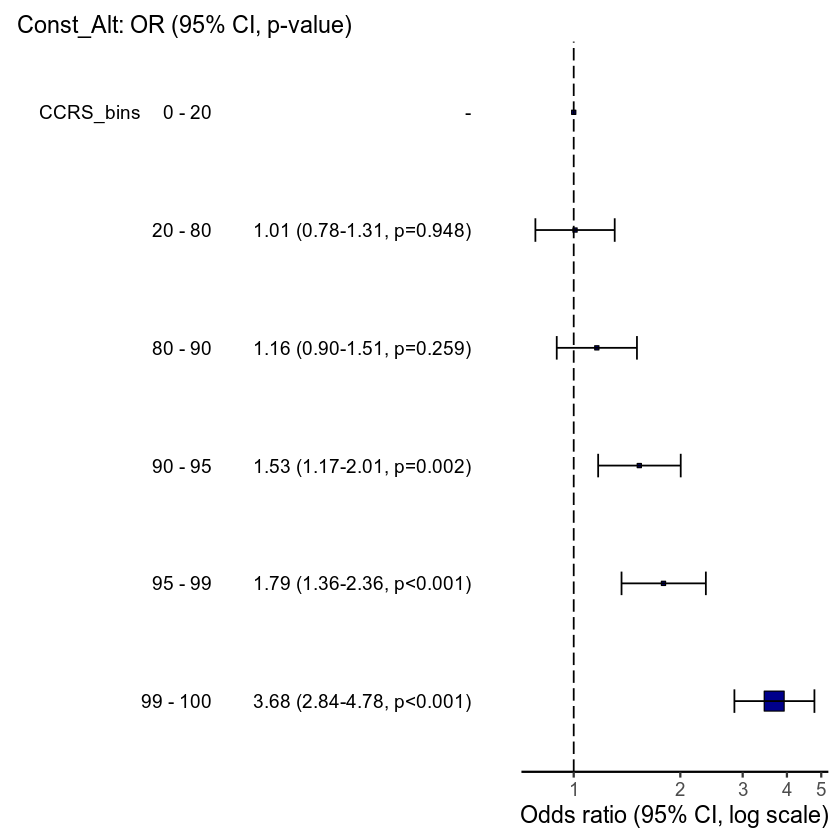

In [117]:
new_df %>% or_plot(dependent, explanatory, table_text_size = 4, title_text_size = 14, column_space = c(-0.5, -0.1, 0.5))

In [4]:
    data("heart_disease")
    HD <- heart_disease
    head(HD)

Warning message in data("heart_disease"):
“data set ‘heart_disease’ not found”


ERROR: Error in eval(expr, envir, enclos): objet 'heart_disease' introuvable
